In [1]:
from random import random

time_series = [2* x + random() for x in range(1, 100)]


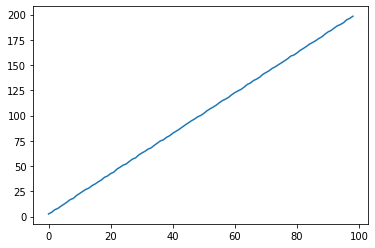

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()

Lets try auto regression

In [6]:
from statsmodels.tsa.ar_model import AR
model = AR(time_series)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[200.45407582]


Moving Average

In [7]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(time_series, order=(0,1))
model_fit = model.fit(disp=False)

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[152.40855243]


Simple exponential smoothing EES

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(time_series)
model_fit = model.fit()
y = model_fit.predict(len(time_series), len(time_series))
print(y)

[198.42071236]


In the first step, we generate a simple toy time series. The series consists of values on a line
sprinkled with some added noise. Next, we plot our time series in step 2. You can see that it
is very close to a straight line and that a sensible prediction for the value of the time series
at time is . To create a forecast of the value of the time series, we consider three different
schemes (step 3) for predicting the future values of the time series. In an autoregressive
model, the basic idea is that the value of the time series at time t is a linear function of the
values of the time series at the previous times. More precisely, there are some constants, 
, and a number, , such that:
As a hypothetical example, may be 3, meaning that the value of the time series can be
easily computed from knowing its last 3 values.
In the moving-average model, the time series is modeled as fluctuating about a mean. More
precisely, let be a sequence of i.i.d normal variables and let be a constant. Then, the
time series is modeled by the following formula:
For that reason, it performs poorly in predicting the noisy linear time series we have
generated.
Finally, in simple exponential smoothing, we propose a smoothing parameter, .
Then, our model's estimate, , is computed from the following equations:
In other words, we keep track of an estimate, , and adjust it slightly using the current
time series value, . How strongly the adjustment is made is regulated by the 
parameter